### 1. 데이터 불러오기 및 탐색

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('seoul_covid19_9_28_.csv', encoding = 'cp949')
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
3,5239,23685,9.28.,영등포구,-,확진자 조사 중,NaN
4,5238,23675,9.28.,성북구,-,기타 확진자 접촉,NaN


In [6]:
df = df.sort_values(by = ['확진일','환자'], ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
2,5240,23698,9.28.,관악구,-,확진자 조사 중,NaN
1,5241,23697,9.28.,도봉구,-,도봉구 다나병원,NaN
0,5242,23696,9.28.,도봉구,-,도봉구 다나병원,NaN
7,5235,23695,9.28.,관악구,-,기타 확진자 접촉,NaN
8,5234,23689,9.28.,동작구,-,확진자 조사 중,NaN


### 2. 시각화 도구 불러오기

<AxesSubplot:>

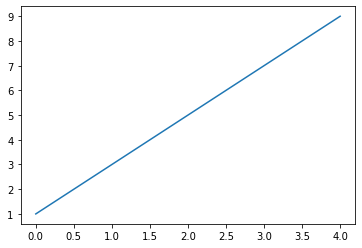

In [7]:
pd.Series([1,3,5,7,9]).plot()

In [9]:
import matplotlib.pyplot as plt
plt.rc('font',family = 'Malgun Gothic')
plt.style.use('fivethirtyeight')

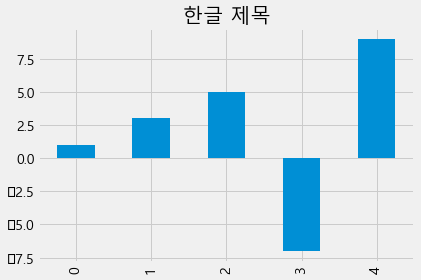

In [11]:
pd.Series([1,3,5,-7,9]).plot.bar(title = '한글 제목')
plt.show()

In [12]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보인다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

### 3. 확진일

In [13]:
# 데이터 구조 파악
df['확진일'].head()

2    9.28.
1    9.28.
0    9.28.
7    9.28.
8    9.28.
Name: 확진일, dtype: object

In [14]:
# 확진일 빈도수 파악
df['확진일'].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
4.15.      1
3.3.       1
2.7.       1
4.24.      1
5.17.      1
Name: 확진일, Length: 221, dtype: int64

In [17]:
# 데이터 타입 변경(문자 형태 -> 날짜 형태)
df['확진일자'] = pd.to_datetime("2020-"+ df['확진일'].str.replace('.','-'))
df['확진일자'].head()

<ipython-input-17-ae84fbfd7d61>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['확진일자'] = pd.to_datetime("2020-"+ df['확진일'].str.replace('.','-'))


2   2020-09-28
1   2020-09-28
0   2020-09-28
7   2020-09-28
8   2020-09-28
Name: 확진일자, dtype: datetime64[ns]

<AxesSubplot:>

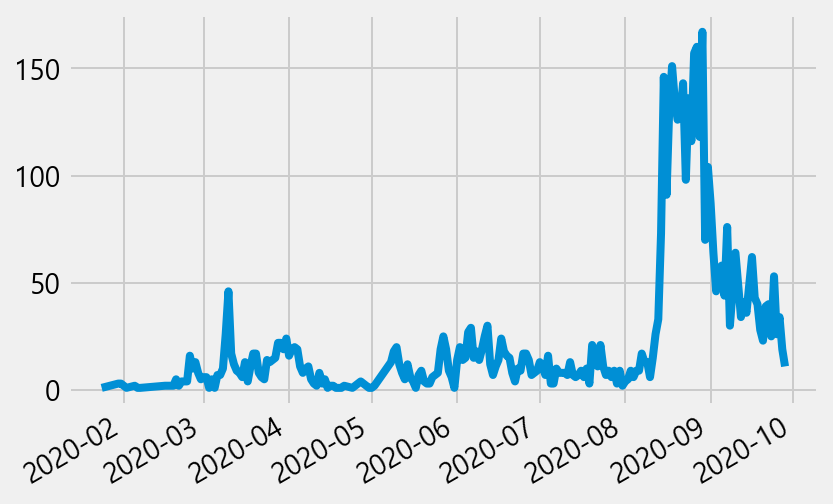

In [19]:
df['확진일자'].value_counts().plot()

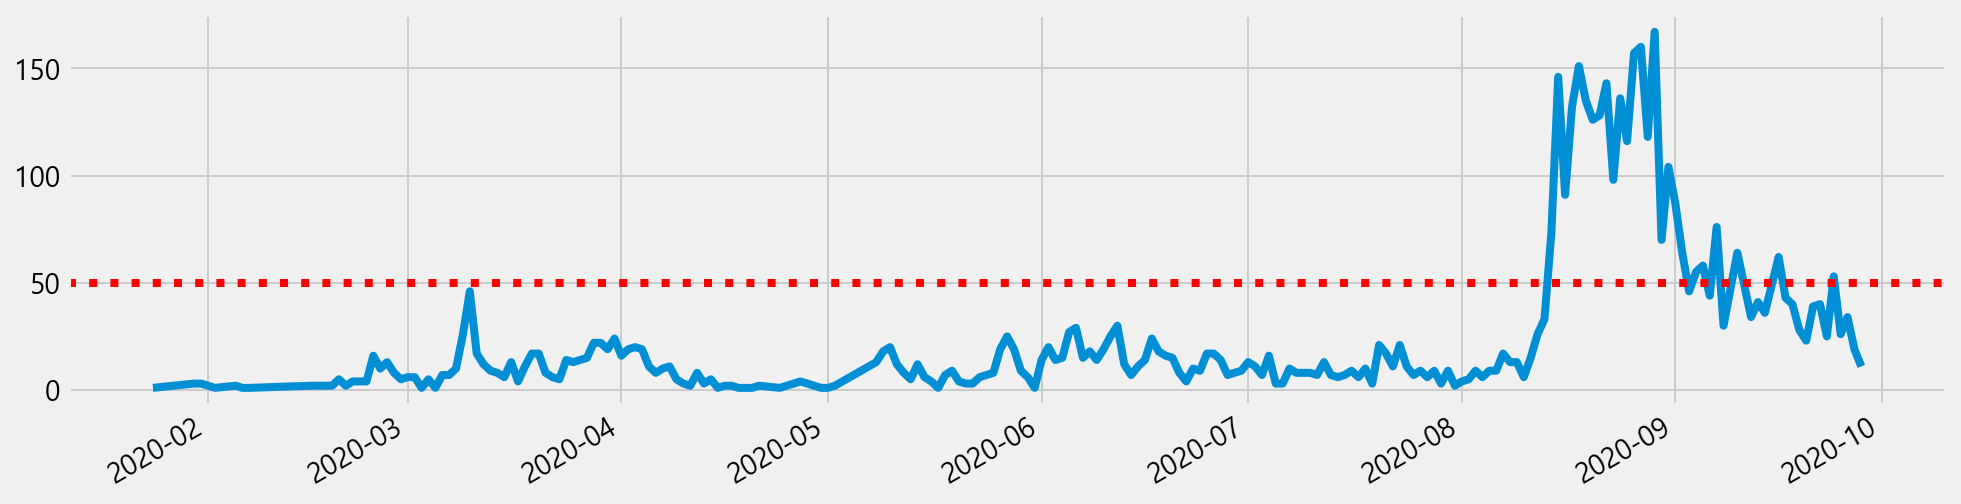

In [20]:
# 선 그래프
df['확진일자'].value_counts().sort_index().plot(figsize = (15,4))
plt.axhline(50, color = 'red', linestyle = ':')

In [21]:
# 뒤에서 문자 5개 가지고 오기
df['확진일자'].astype(str).map(lambda x : x[-5:]).head()

2    09-28
1    09-28
0    09-28
7    09-28
8    09-28
Name: 확진일자, dtype: object

In [22]:
# 슬라이싱을 사용해 "월일" 컬럼을 만든다.
df['월일'] = df['확진일자'].astype(str).map(lambda x : x[-5:])
day_count = df['월일'].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
09-24    53
09-25    26
09-26    34
09-27    19
09-28    11
Name: 월일, Length: 220, dtype: int64

Text(2, 3, '20')

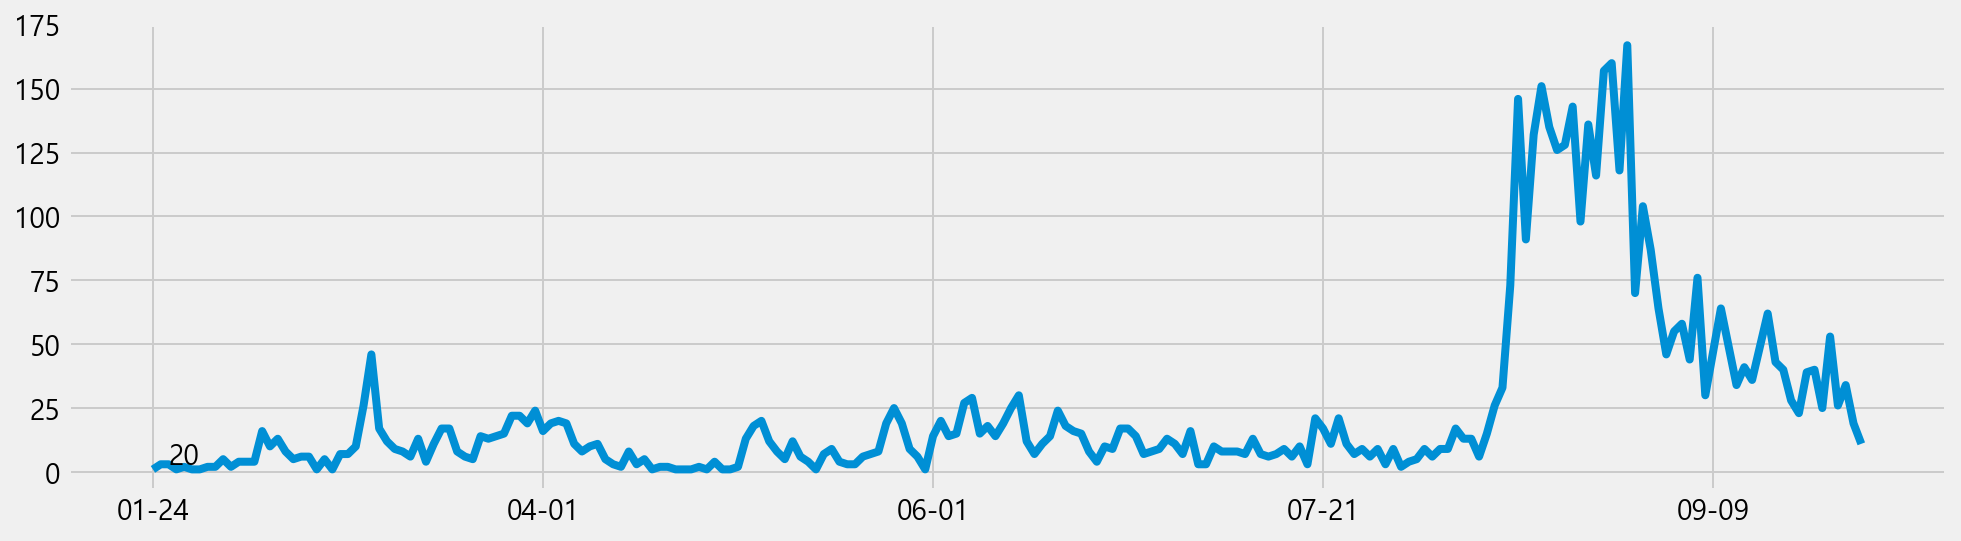

In [23]:
# 선 그래프에 text 삽입
g = day_count.plot(figsize = (15,4))
g.text(x=2, y=3, s=20)

In [25]:
# 환자발생이 50명 이상(사회적 거리두기 2단계)인 것만 추출
# for 반복문 활용
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 50:
        print(i, case_count)

174 73
175 146
176 91
177 132
178 151
179 135
180 126
181 128
182 143
183 98
184 136
185 116
186 157
187 160
188 118
189 167
190 70
191 104
192 87
193 64
195 55
196 58
198 76
201 64
207 62
215 53


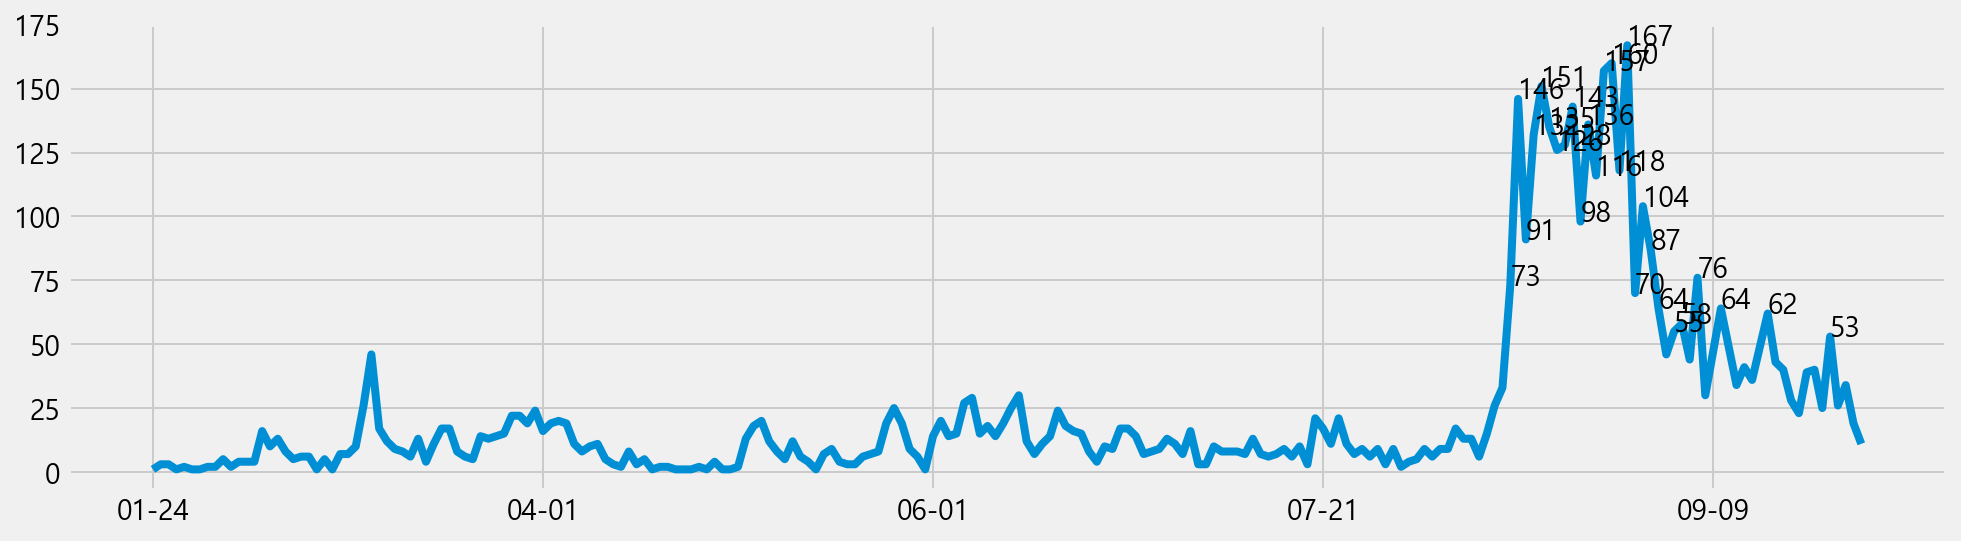

In [26]:
# text(g 변수) 그래프 삽입
g = day_count.plot(figsize = (15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 50:
        g.text(x = i, y = case_count, s=case_count)

In [27]:
day_count.describe()

count    220.000000
mean      23.827273
std       34.439374
min        1.000000
25%        6.000000
50%       11.000000
75%       22.250000
max      167.000000
Name: 월일, dtype: float64

In [28]:
# 확진자가 가장 많이 나온 날
day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [29]:
# 확진자가 가장 많았던 날의 발생이력
df[df['월일'] == "08-29"].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월일
1525,3717,20125,8.29.,기타,-,영등포구 권능교회,NaN,2020-08-29,08-29
1329,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,08-29
1417,3825,19924,8.29.,은평구,-,8.15서울도심집회,퇴원,2020-08-29,08-29
1399,3843,19923,8.29.,서초구,-,관악구 에바다 관련,퇴원,2020-08-29,08-29
1433,3809,19919,8.29.,기타,-,동작구 진흥글로벌,퇴원,2020-08-29,08-29


4. 막대그래프 그리기

<AxesSubplot:>

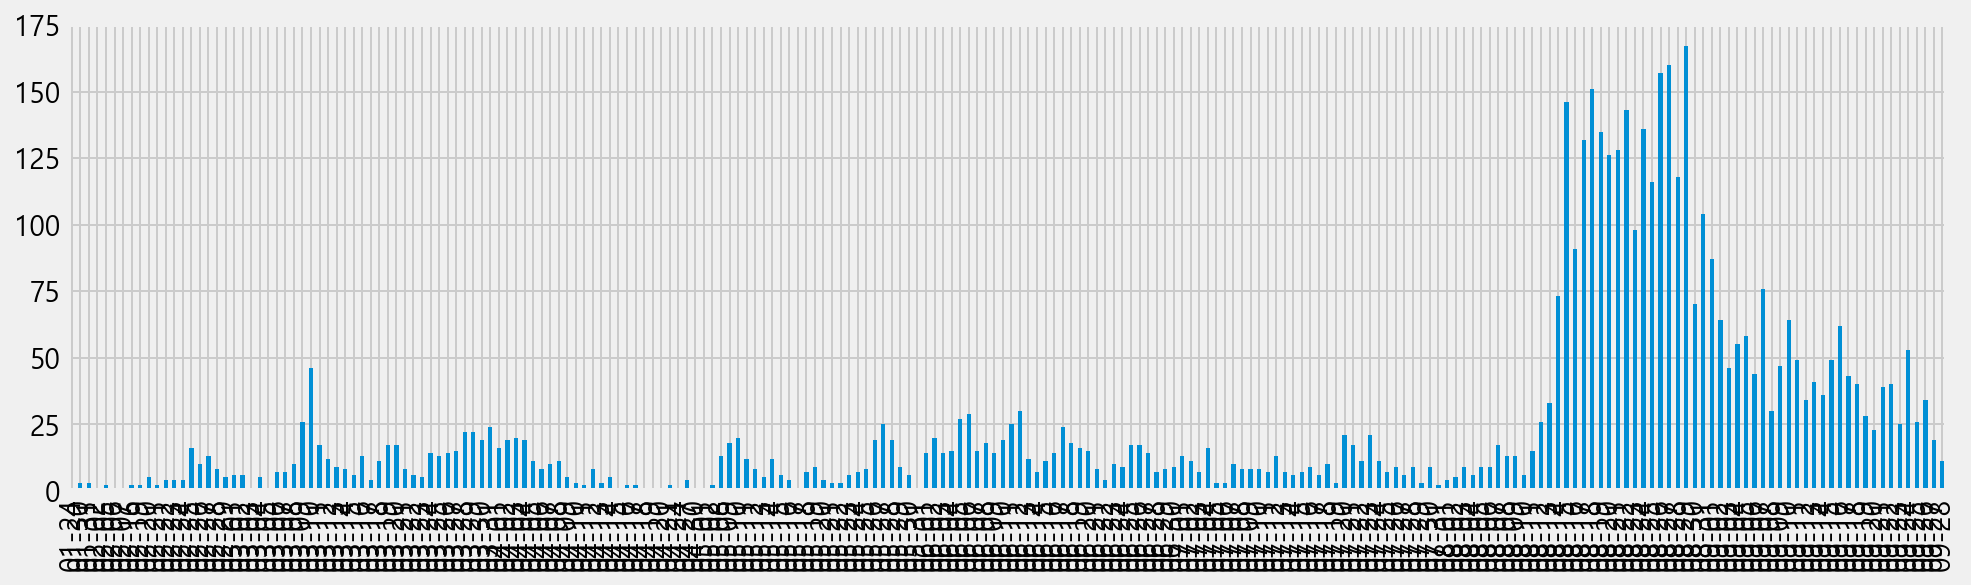

In [30]:
day_count.plot.bar(figsize = (15,4))

5. 슬라이싱으로 나누어 그리기

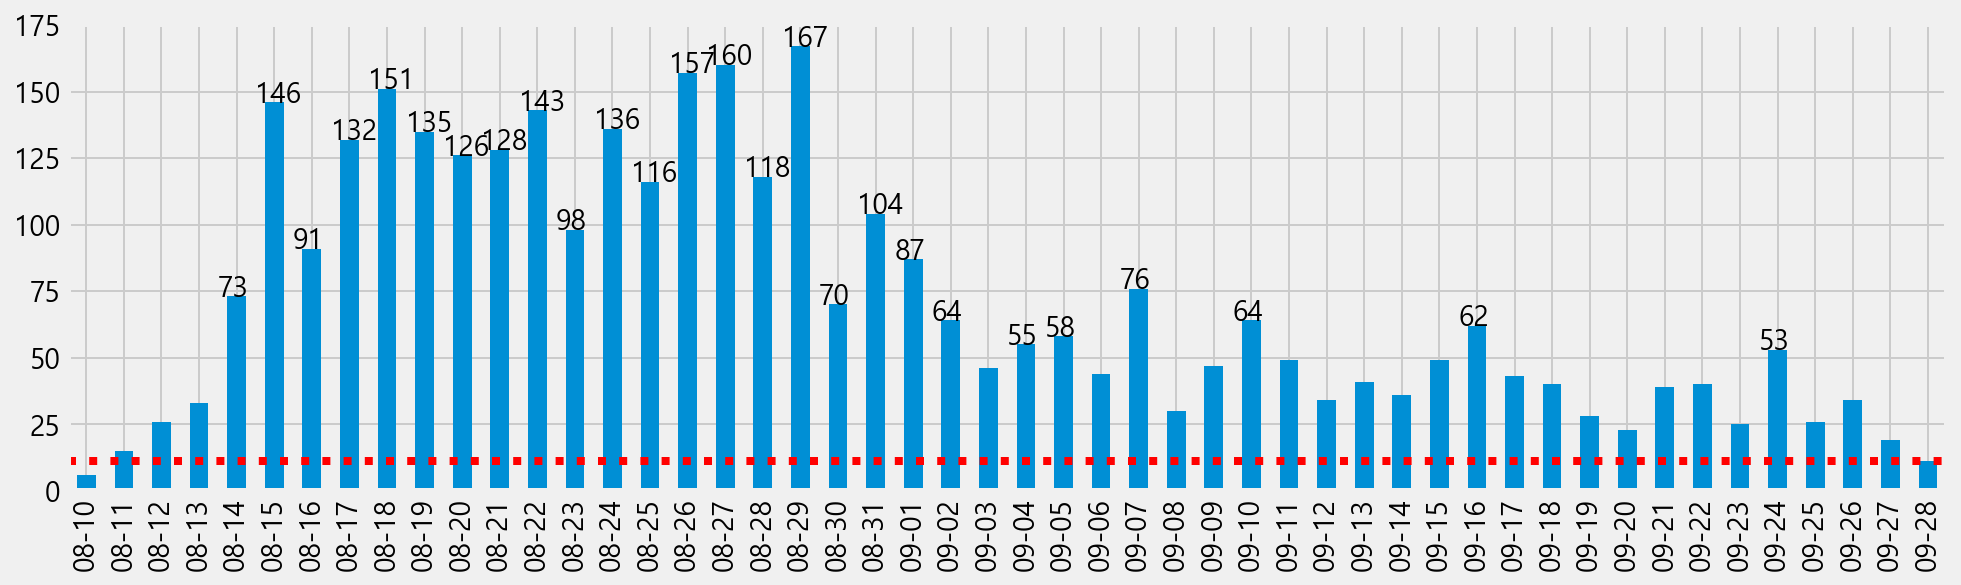

In [32]:
day_count[-50:].plot.bar(figsize = (15,4))
g = day_count[-50:].plot.bar(figsize = (15,4))
g.axhline(day_count.median(), linestyle=':', color = "red")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count >= 50:
        g.text(x=i-0.5, y=case_count, s=case_count)
# x = i-0.5 : text를 가운데로 옮기기 위해 위치 조정

6. 월별 확진자 수 그리기

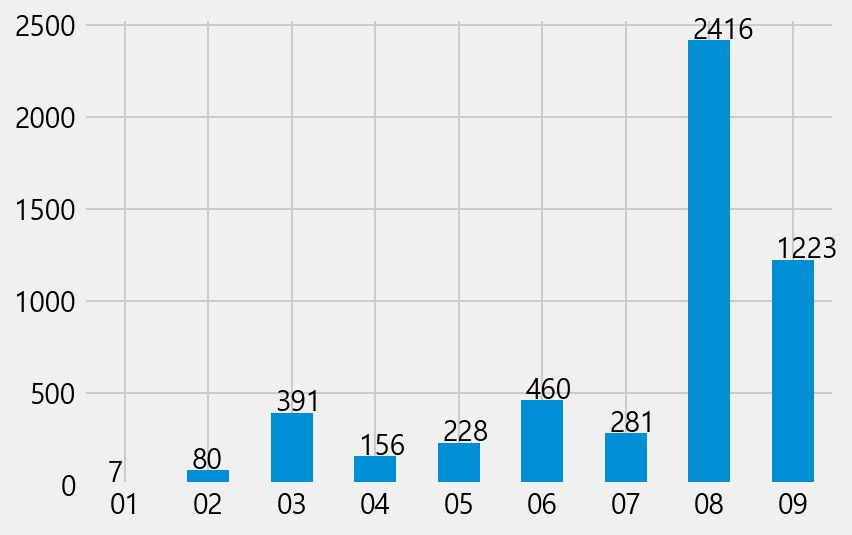

In [34]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화
df['월'] = df['확진일자'].astype(str).map(lambda x : x[-5:-3])
month_case = df['월'].value_counts().sort_index() # 월별로 빈도수 표현
g = month_case.plot.bar(rot=0) # rot=0 : rotation을 0으로 변경

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

7. 주 단위 확진자수 그리기

In [ ]:
# 주 별 확진자수에 대한 빈도수를 구해서 시각화
df['확진일자'].dt.
weekly_case = df['주'].value_counts().sort_index()
weekly_case.plot.bar(figsize = (15,4), rot = 0)

8. 월-주 함께 그리기

In [ ]:
# groupby 서브모듈을 사용
df.groupby(['월','주']).count()